**Aman Dubal**

# Import required libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Importing libraries
Download the dataset : https://github.com/ywchiu/riii/blob/master/data/house-prices.csv

In [49]:
df = pd.read_csv('/content/house-prices.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [50]:
df.columns # retriving column names


Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [51]:
# checking null values in the dataset
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


# Data Preprocessing

Splitting the data into features and target

In [65]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]  # Features
y = df[['Price']]  # Target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (128, 3)
y shape: (128, 1)


# Split the Data
For traning and testing

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Traning

In [67]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

# Make Predictions

In [68]:
# Predict house prices using the test data
y_pred = model.predict(X_test)


#  Evaluate the Model


In [73]:
# Calculate Mean Squared Error , Mean Absoulte Error  and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 320149938.23026794
Mean Absolute Error: 14768.459338206874
R-squared: 0.45681957775488813


#  Visualizing the Results


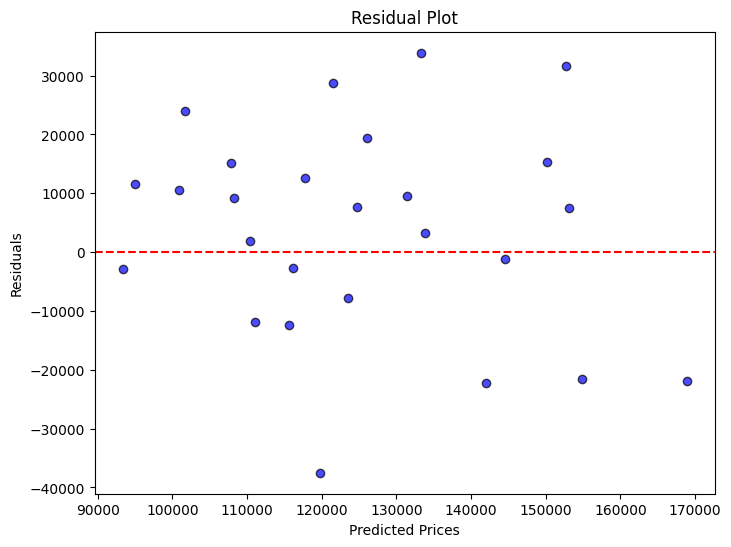

In [57]:
#  Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

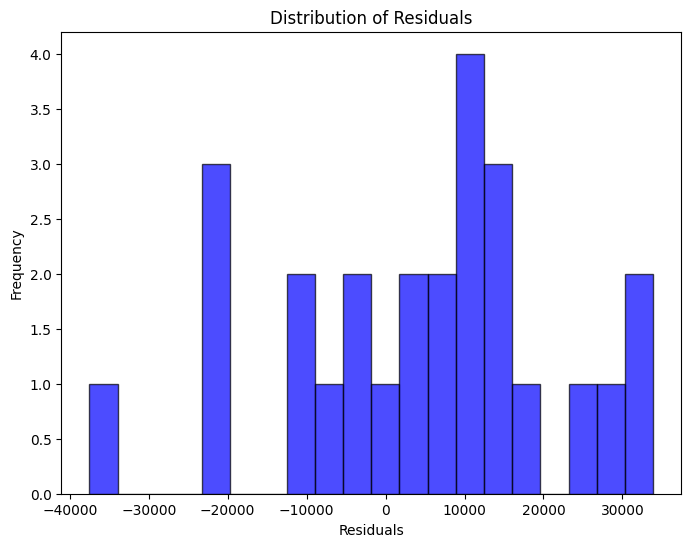

In [58]:
#  Histogram of residuals for additional analysis
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
